KNN model for diabetes prediction 

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('ggplot')

In [84]:
# Load the dataset
df = pd.read_csv('diabetes_dataset.csv') 
# Print the first 5 rows of the df
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [20]:
# check the number of attributes and records
df.shape

(768, 9)

In [ ]:
# Create array for features/attributes and target classes
X = df.drop('Outcome', axis=1).values
y = df['Outcome'].values

In [32]:
# Fit train a classifier on the training set and make predictions on the test set
# Then compare the predictions with the known labels

from sklearn.model_selection import train_test_split

In [42]:
# stratify is used to maintain the proportion of classes as in df, same in splits
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.4, random_state=42, stratify=y)

In [78]:
# Import KNeighborsclassifier
from sklearn.neighbors import KNeighborsClassifier

# Setup arrays to store training and test accuracies
neighbors = np.arange(1,20)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i, k in enumerate(neighbors):
    # setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # fit the model
    knn.fit(X_train, y_train)
    
    # Compute  accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)
    test_accuracy[i]
    
    print("Test accuracy for k =",i + 1,"is", test_accuracy[i])
    

Test accuracy for k = 1 is 0.6785714285714286
Test accuracy for k = 2 is 0.6948051948051948
Test accuracy for k = 3 is 0.685064935064935
Test accuracy for k = 4 is 0.7077922077922078
Test accuracy for k = 5 is 0.7012987012987013
Test accuracy for k = 6 is 0.724025974025974
Test accuracy for k = 7 is 0.7305194805194806
Test accuracy for k = 8 is 0.7012987012987013
Test accuracy for k = 9 is 0.7142857142857143
Test accuracy for k = 10 is 0.7207792207792207
Test accuracy for k = 11 is 0.7142857142857143
Test accuracy for k = 12 is 0.7077922077922078
Test accuracy for k = 13 is 0.7077922077922078
Test accuracy for k = 14 is 0.7305194805194806
Test accuracy for k = 15 is 0.7305194805194806
Test accuracy for k = 16 is 0.7337662337662337
Test accuracy for k = 17 is 0.7207792207792207
Test accuracy for k = 18 is 0.7337662337662337
Test accuracy for k = 19 is 0.724025974025974


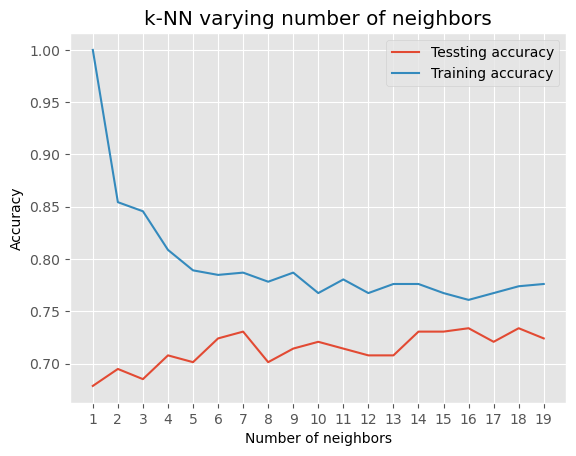

In [85]:
# Generate a plot
plt.title('k-NN varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Tessting accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')

plt.xticks(range(1, 20))
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [93]:
# From the graph we identified optimal k value as 7 - so set up a knn classifier with k value
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [94]:
# Get accuracy - in case of classfication algorithms score method represents accuracy
knn.score(X_test, y_test)

0.7305194805194806

Confusion matrix
 - Confusion matrix is a table used to describe the performance of a classification model
 - scikit-learn provides facility to calculate confusion matrix using the confusion_maatrix method
 

In [99]:
from sklearn.metrics import confusion_matrix

y_pred = knn.predict(X_test)
confusion_matrix(y_test, y_pred)


array([[165,  36],
       [ 47,  60]], dtype=int64)

In [100]:
# Confusion matrix can also be obtained using crosstab method of Pandas
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,165,36,201
1,47,60,107
All,212,96,308


ROC (Receiver Operating Characteristics) curve

In [122]:
# y_pred_proba = knn.predict_proba(X_test)[:,1]
y_predict = knn.predict(X_test)

for i in range(10):
    print(y_test[i], y_predict[i], y_pred_proba[i], "\n")
    
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

0 0 0.0 

0 0 0.0 

0 1 0.7142857142857143 

0 0 0.14285714285714285 

0 0 0.0 

0 0 0.0 

0 0 0.2857142857142857 

0 0 0.0 

1 1 0.5714285714285714 

1 0 0.2857142857142857 



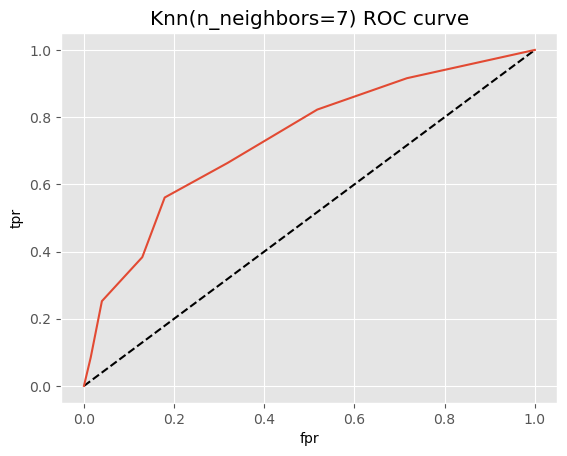

In [124]:
plt.plot([0,1], [0,1], 'k--')
plt.plot(fpr, tpr, label="Knn")
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()